In [42]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


In [43]:
# Load the Glass dataset
data = pd.read_csv('Glass.csv')

In [44]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## Exploratory Data Analysis (EDA)

In [46]:
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())
    

Dataset Shape: (214, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None

Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1

In [47]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


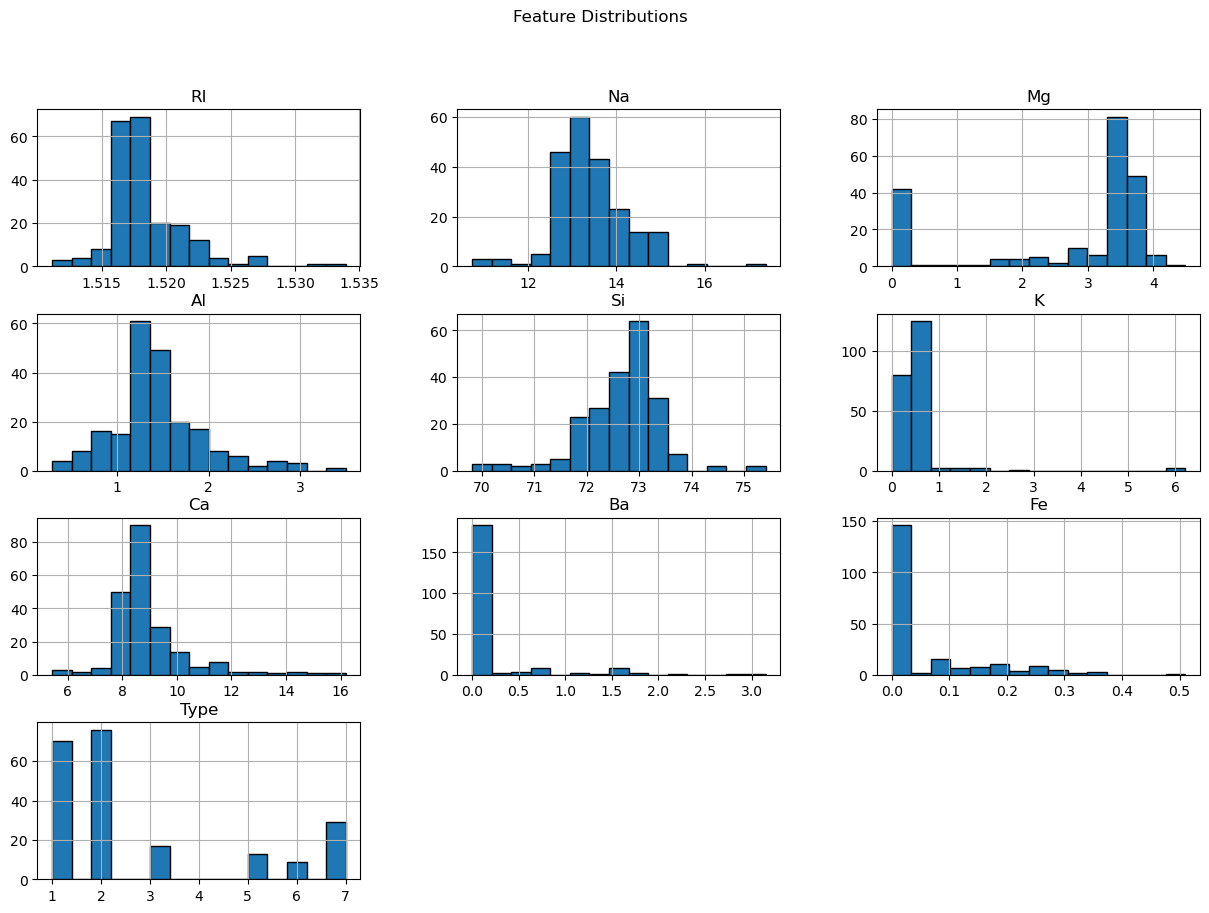

In [48]:
 # Visualizing feature distributions
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


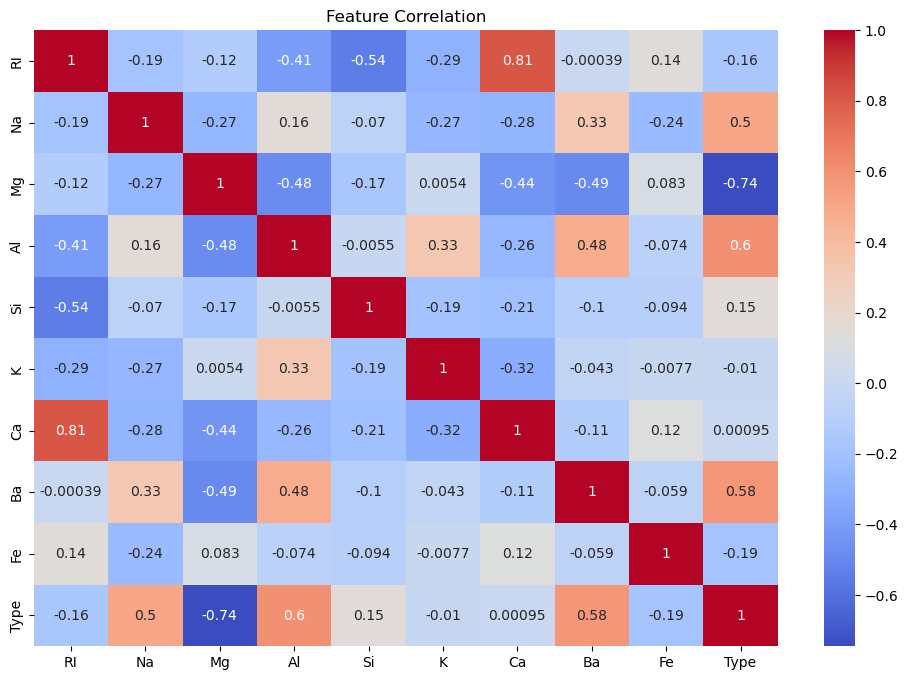

In [49]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


## Data Preprocessing

In [51]:
# Separate features and target
target_column = 'Type'  # Replace with the actual target column name
X = data.drop(columns=[target_column])
y = data[target_column]


In [52]:
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [53]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Random Forest Model Implementation

In [54]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Predictions and Evaluation

In [55]:
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Confusion Matrix:
[[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Accuracy: 0.8372093023255814


## Bagging

In [57]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_predictions))



Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.85      0.79      0.81        14
           3       0.50      0.33      0.40         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.84        43
   macro avg       0.84      0.80      0.81        43
weighted avg       0.84      0.84      0.83        43



In [63]:
import warnings
warnings.filterwarnings('ignore')

## Boosting

In [65]:
boosting_model = AdaBoostClassifier(random_state=42)
boosting_model.fit(X_train, y_train)

boosting_predictions = boosting_model.predict(X_test)
print("\nBoosting Classification Report:")
print(classification_report(y_test, boosting_predictions))



Boosting Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.91      0.65        11
           2       0.35      0.43      0.39        14
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         8

    accuracy                           0.49        43
   macro avg       0.43      0.43      0.38        43
weighted avg       0.48      0.49      0.43        43



## Comparison of Accuracy

In [67]:
print("\nModel Accuracy Comparison:")
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Bagging Accuracy:", accuracy_score(y_test, bagging_predictions))
print("Boosting Accuracy:", accuracy_score(y_test, boosting_predictions))



Model Accuracy Comparison:
Random Forest Accuracy: 0.8372093023255814
Bagging Accuracy: 0.8372093023255814
Boosting Accuracy: 0.4883720930232558


In [70]:
## 1. Explain Bagging and Boosting methods. How is it different from each other.
## Bagging (Bootstrap Aggregating):
#Purpose: Reduces variance and prevents overfitting.
#Method: Trains multiple models (usually decision trees) on different bootstrapped subsets of the training data. The final prediction is made by averaging the results (for regression) or using majority voting (for classification).
#Example: Random Forest.

## Boosting:
#Purpose: Reduces bias by focusing on correcting errors made by previous models.
#Method: Trains models sequentially, where each new model tries to correct the mistakes of the previous ones. The final prediction is a weighted sum of the predictions of all models.
#Example: AdaBoost, Gradient Boosting.

## Differences:

# Bagging reduces variance through parallel learning, while Boosting reduces bias through sequential learning.
# Bagging combines predictions equally, whereas Boosting gives more weight to the errors of previous models.


In [ ]:
##Explain how to handle imbalance in the data.
## Resampling:
#Oversampling: Increase the number of instances in the minority class (e.g., using SMOTE).
#Undersampling: Reduce the number of instances in the majority class.
## Class Weights: Assign higher weights to the minority class during model training to give it more importance.
#Synthetic Data Generation: Use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic samples for the minority class.
#Anomaly Detection: Treat the minority class as an anomaly and use anomaly detection models.
#Evaluation Metrics: Use metrics like Precision, Recall, F1-Score, and AUC instead of accuracy, as they better capture performance on imbalanced data.